# 🎵 What Makes a Song Popular?

## 📌 Dataset & Presentation Links
- **Dataset**: [Dataset](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset)
- **Presentation Video**: [Presentation Video - Timothy Liu](https://pitt.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=036c8ca8-bee7-4a37-9b45-b29e00f18a57)


In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("dataset.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [7]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## Clean & Prepare the Data

In [10]:
# Drop unnecessary columns
df.drop(columns=['Unnamed: 0', 'track_id', 'album_name'], inplace=True)

In [12]:
# Check for missing values
print(df.isnull().sum())

artists             1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [14]:
# Drop or fill missing values
df.dropna(inplace=True)

## Explore Popularity Distribution

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

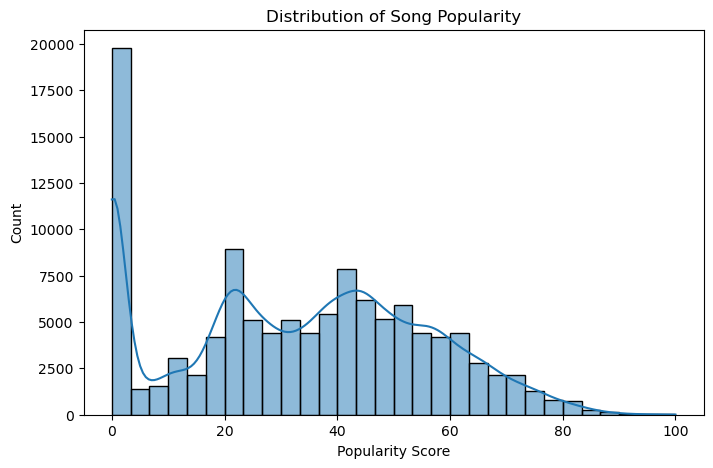

In [18]:
# Plot the distribution of popularity
plt.figure(figsize=(8, 5))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title("Distribution of Song Popularity")
plt.xlabel("Popularity Score")
plt.ylabel("Count")
plt.show()

## Popularity Distribution Analysis

The histogram below represents the **distribution of song popularity scores** in our dataset.

### Key Observations:
- **Most songs have very low popularity scores (close to 0).**
  - This suggests that the majority of tracks are **not widely played or streamed**.
- **A secondary peak appears around the 20-40 popularity range.**
  - This indicates that some songs gain **moderate attention**, but do not become mainstream hits.
- **The number of highly popular songs (above 80) is very small.**
  - Only a handful of tracks achieve **viral or chart-topping status**.

### Business Insights:
- **Most songs struggle to gain traction**, highlighting the competitive nature of the music industry.
- **Streaming services and record labels could focus on strategies** to boost mid-tier songs (20-40 popularity) into viral hits.
- **Artists should analyze the features of high-popularity songs** (danceability, energy, and genre) to improve their reach.

---

## Check Correlation Between Features and Popularity

In [22]:
# Compute correlation matrix for numeric columns only
correlation = df.select_dtypes(include=['number']).corr()

In [24]:
# Plot heatmap
import matplotlib.pyplot as plt
import seaborn as sns

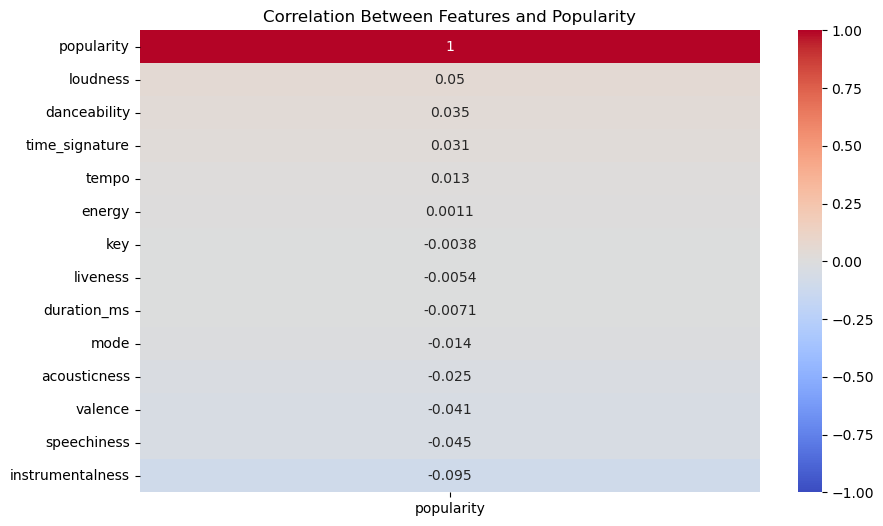

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation[['popularity']].sort_values(by='popularity', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Between Features and Popularity")
plt.show()

## Correlation Between Audio Features & Popularity

The heatmap below displays the **correlation between various song attributes and popularity**.

### Key Insights:
- **Most features show very weak correlation with popularity** (values close to 0).
- **Loudness (0.05) has the highest positive correlation**, suggesting **louder songs tend to be slightly more popular**.
- **Danceability (0.035) shows a small positive relationship**, indicating that **more danceable tracks may perform better**.
- **Instrumentalness (-0.095) has the strongest negative correlation**, meaning **songs with fewer lyrics tend to be less popular**.
- **Other features like tempo, energy, valence, and acousticness have near-zero correlations**, suggesting that **audio properties alone do not drive a song’s popularity**.

### Business Implications:
- **Marketing, playlist placement, and artist fame may be more important than audio features** in determining popularity.
- **Producers aiming for mainstream success might focus on making songs louder and more danceable**.
- **Instrumental tracks generally perform worse**, so artists looking for mass appeal should include lyrics.


## Analyze Key Relationships

### Do Danceable Songs Tend to Be More Popular?

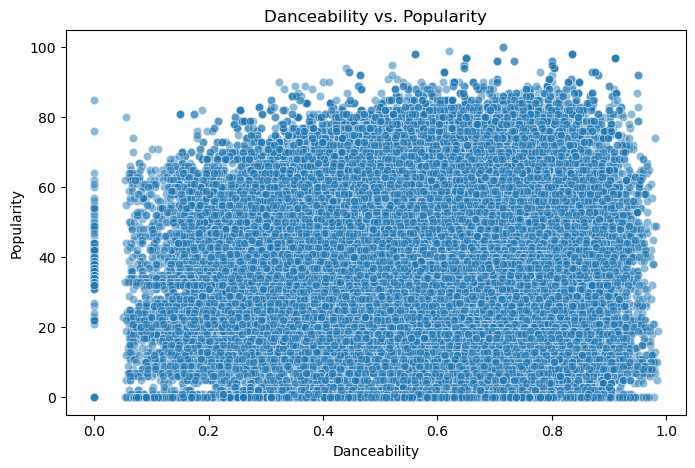

In [30]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['danceability'], y=df['popularity'], alpha=0.5)
plt.title("Danceability vs. Popularity")
plt.xlabel("Danceability")
plt.ylabel("Popularity")
plt.show()

## Danceability vs. Popularity

This scatter plot examines whether **more danceable songs tend to be more popular**.

### Key Observations:
- **There is a weak positive correlation** between danceability and popularity.
  - Higher danceability **slightly aligns** with higher popularity.
  - However, danceability alone **is not a strong predictor of popularity**.
- **Wide popularity range at all danceability levels**:
  - Songs with **low danceability** can still be popular.
  - Songs with **high danceability (0.8 - 1.0) exist at all popularity levels**.
- **Many songs have very low popularity** regardless of danceability.
  - This suggests that **factors outside of audio features (e.g., artist recognition, playlist placement, marketing) play a bigger role in a song’s success**.

### Business Insights:
- **Highly danceable songs might have a better chance at success, but it is not guaranteed**.
- **Producers & labels should consider marketing, streaming strategy, and artist engagement rather than relying solely on danceability**.
- **For dance-centric playlists (e.g., club music, workout playlists), danceability might be more relevant** than for other genres.


### Is Energy Related to Popularity?

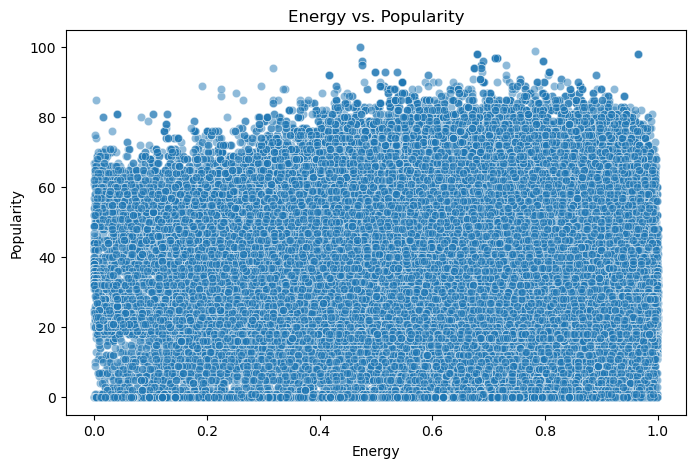

In [33]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['energy'], y=df['popularity'], alpha=0.5)
plt.title("Energy vs. Popularity")
plt.xlabel("Energy")
plt.ylabel("Popularity")
plt.show()

## Energy vs. Popularity

This scatter plot examines whether **songs with higher energy levels tend to be more popular**.

### Key Observations:
- **There is no strong correlation between energy and popularity**.
  - Data points are widely scattered, indicating **energy does not significantly impact popularity**.
- **All energy levels contain both popular and unpopular songs**:
  - Low-energy songs (0.0 - 0.3) can still be **very popular**.
  - High-energy songs (0.7 - 1.0) include **both top hits and unpopular tracks**.
- **Popularity is likely driven by external factors**:
  - Artist recognition, playlist placement, and marketing **may influence success more than audio features**.

### Business Insights:
- **Energy is not a defining factor for a song’s popularity**.
- **Music producers should not rely on energy alone** when crafting hit songs.
- **Streaming platforms and record labels should focus more on artist branding, playlist strategy, and listener engagement** rather than energy levels.

### Explicit Songs vs. Popularity

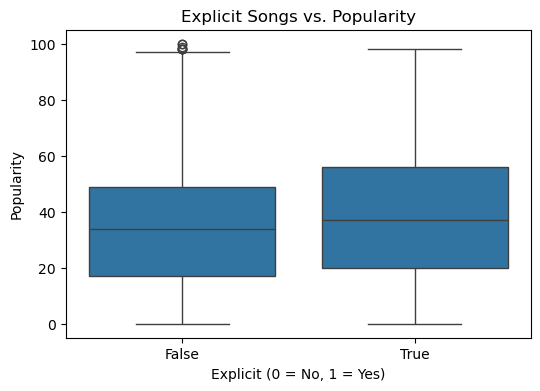

In [36]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['explicit'], y=df['popularity'])
plt.title("Explicit Songs vs. Popularity")
plt.xlabel("Explicit (0 = No, 1 = Yes)")
plt.ylabel("Popularity")
plt.show()

This box plot compares the popularity of **explicit vs. non-explicit songs**.

### Key Observations:
- **Explicit and non-explicit songs have similar popularity distributions**.
  - The median popularity is almost the same for both categories.
  - Both explicit and non-explicit songs exist across **all popularity levels**.
- **Explicit songs have slightly higher popularity at the upper range**.
  - Some **explicit songs reach maximum popularity (100)**, possibly due to the influence of hip-hop, rap, and pop.
- **Non-explicit songs still achieve high popularity**.
  - The top **1% of non-explicit songs are also massive hits**, proving that explicit content is **not required for success**.
- **No strong correlation between explicit content and popularity**.
  - This suggests that **genre, marketing, and artist recognition influence popularity more than explicit lyrics**.

### Business Insights:
- **Artists do not need explicit content to create hit songs**.
- **Explicit lyrics may be more common in certain genres (e.g., hip-hop, rap, pop) but are not a necessity for mainstream success**.
- **Streaming platforms and record labels should focus on genre trends, playlist placement, and artist engagement rather than explicit content alone**.

### Genre-Based Popularity Analysis

In [39]:
# Group by genre and calculate the average popularity
genre_popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

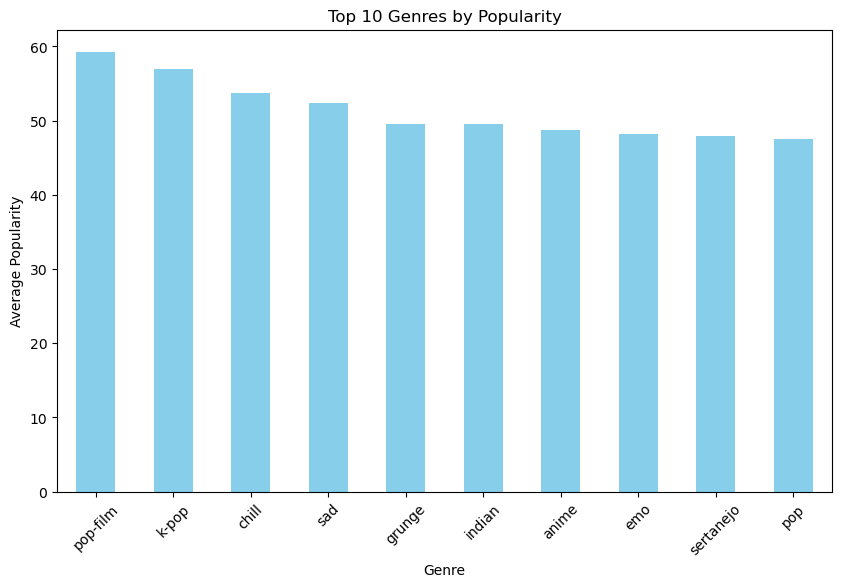

In [41]:
# Plot the top genres by popularity
plt.figure(figsize=(10, 6))
genre_popularity.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Genres by Popularity")
plt.xlabel("Genre")
plt.ylabel("Average Popularity")
plt.xticks(rotation=45)
plt.show()

## Top 10 Music Genres by Popularity

This bar chart highlights the **top 10 music genres** with the highest average popularity.

### Key Observations:
- **Pop-film and K-pop are the most popular genres**.
  - Pop-film (soundtracks and movie-related pop) has the highest average popularity.
  - K-pop ranks second, showing the **global influence of Korean music**.
- **Chill and sad genres are also highly popular**.
  - This suggests a strong listener preference for **relaxed and emotional music**.
- **Grunge, Indian, and Anime genres make a surprising appearance**.
  - Grunge remains popular, possibly due to nostalgia and alternative rock fans.
  - Indian and anime music have **strong niche audiences**.
- **Traditional pop remains relevant**.
  - Despite the rise of specialized genres, **pop continues to be a widely consumed genre**.

### Business Insights:
- **Streaming services should focus on playlist curation for these top genres**.
- **Emerging genres like anime and Indian music are gaining traction**, offering growth opportunities.
- **Music marketers should capitalize on the emotional connection of chill and sad music** in advertisements and campaigns.

### Build a Predictive Model

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [53]:
# Select features & target
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = df[features]
y = df['popularity']

In [55]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [58]:
# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 10.78


We trained a **Random Forest Regression model** to predict a song’s popularity based on its **audio features**.

### Key Observations:
- **Model Performance**
  - The **Mean Absolute Error (MAE) is 10.78**, meaning predictions are off by about **10.78 popularity points on average**.
  - This suggests a **moderate level of accuracy**, but there is **room for improvement**.
- **Are Audio Features Good Predictors of Popularity?**
  - While features like **danceability, energy, loudness, and valence contribute to a song’s character**, they **alone cannot fully determine popularity**.
  - **External factors like marketing, artist reputation, playlist placement, and social media trends** likely have a greater impact.
- **Ways to Improve the Model**
  - **Include additional features** such as **artist recognition, genre, and streaming statistics**.
  - **Experiment with advanced models** (e.g., **Gradient Boosting, Neural Networks**) to improve predictions.
  - **Feature engineering:** Combining related features (e.g., energy & loudness) might enhance model performance.

### Business Insights:
- **Popularity is not just about musical features**—external factors matter significantly.
- **Streaming services and record labels can leverage predictive models** to assess potential hit songs, but **marketing strategies remain crucial**.
- **Future research should explore non-audio factors** (e.g., social media engagement, artist collaborations) to refine predictions.